In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import athplot
import numpy as np
import os
import importlib
os.chdir("/home/astrosun/jtlaune/athena/")
from mpl_styles import analytic
%matplotlib widget
import yt
yt.set_log_level("error")
importlib.reload(athplot)

<module 'athplot' from '/home/astrosun/jtlaune/athena/athplot.py'>

In [2]:
workdir = "/home/astrosun/jtlaune/athena/work/m-wave/testing/"

# 2D plots

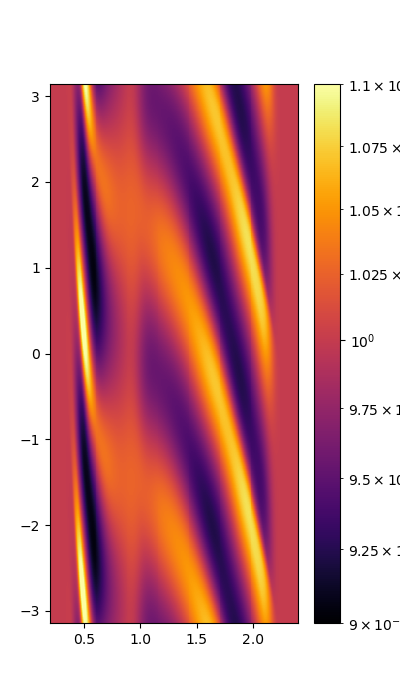

In [20]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted(os.path.join(workdir, "ppd_cyl.out1.00096.athdf"))
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(1):
    cccs, lds = ds.get_level(lev)  # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(
        meshr,
        meshphi,
        lds["dens"],
        shading="nearest",
        cmap="inferno",
        norm=colors.LogNorm(vmin=0.9, vmax=1.1),
    )

plt.colorbar(im)

# Mesh

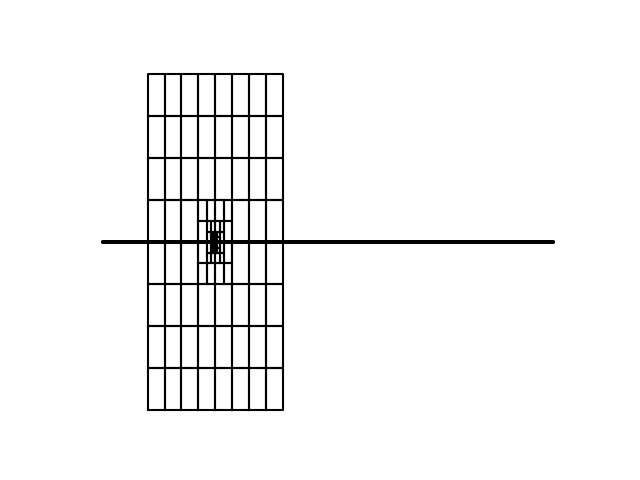

In [49]:
%run -i vis/python/plot_mesh.py -i work/type2/accrete/mesh_structure.dat -o show

# Torque magnitudes over time

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='$T/(2\\pi\\Omega^{-1})$', ylabel='$\\Gamma/(M_pR_0^2\\Omega^2)$'>)

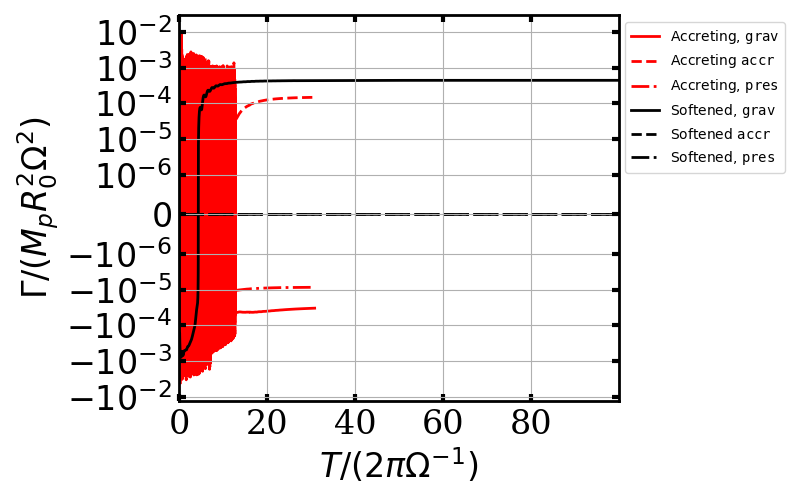

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)


In [22]:
from matplotlib import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import athplot
import importlib
importlib.reload(athplot)
acc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_gfexcFix/ppd_cyl.hst")
fig, ax = acc.plotGravTorq("Accreting",symlog=True,linthresh=1e-6,c="r")
noAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc/ppd_cyl.hst")
noAcc.plotGravTorq("Softened",symlog=True,linthresh=1e-6,figax=(fig,ax))

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='$T/(2\\pi\\Omega^{-1})$', ylabel='$\\Gamma/(M_pR_0^2\\Omega^2)$'>)

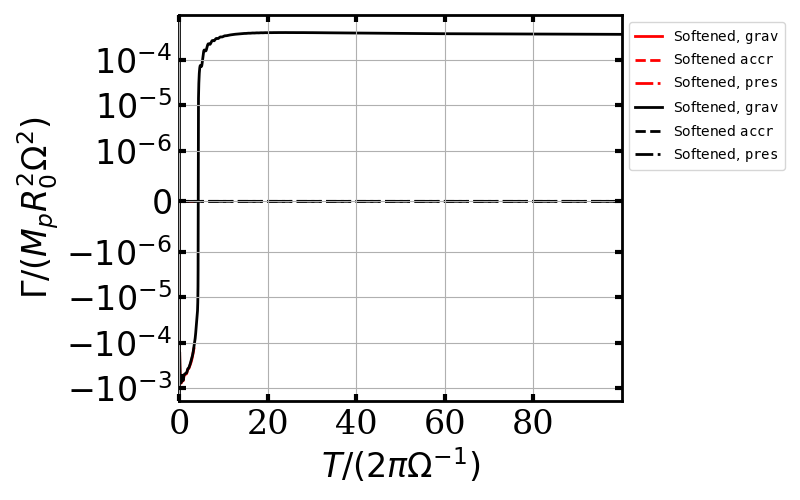

In [15]:
noAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc/ppd_cyl.hst")
noAcc_nx128 = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/smr4_noAcc_nx128_ny384/ppd_cyl.hst")
fig, ax = noAcc.plotGravTorq("Softened",symlog=True,linthresh=1e-6,c="r")
noAcc_nx128.plotGravTorq("Softened",symlog=True,linthresh=1e-6,figax=(fig,ax))

# Density profiles over time

yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:20,909 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 K
yt :

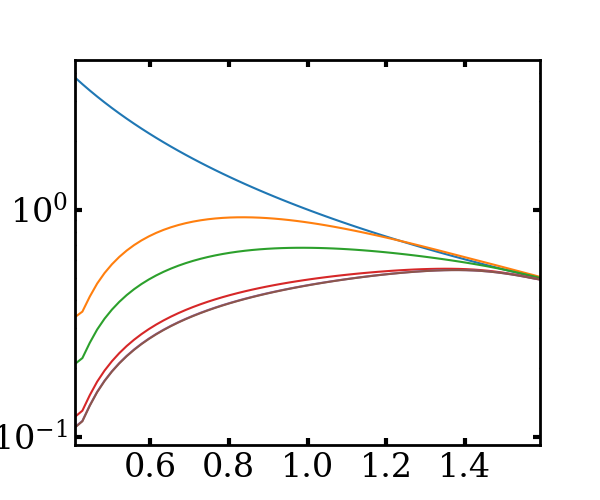

In [25]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noPlanet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:27,853 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:27,854 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:27,883 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:28,827 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:28,829 Assuming 1.0 = 1.0 K
yt :

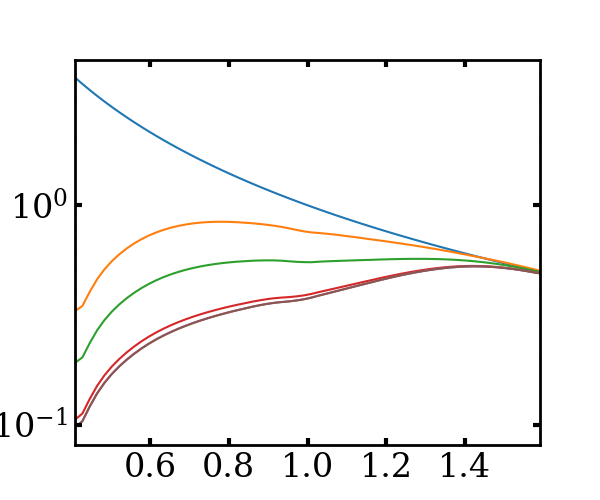

In [26]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,735 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:35,617 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:35,618 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 K
yt :

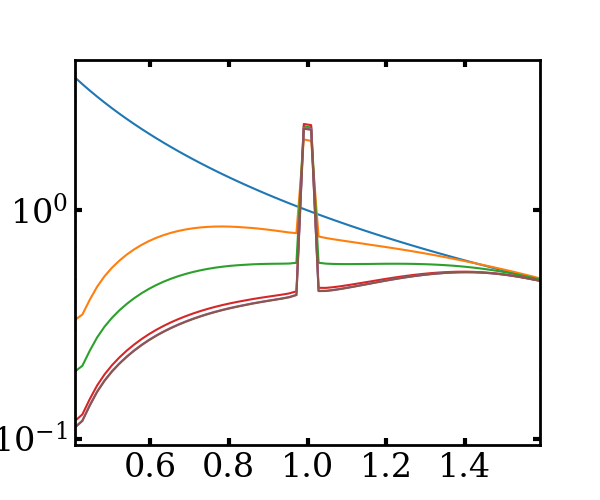

In [27]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noAcc/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

# $\dot M$ profiles

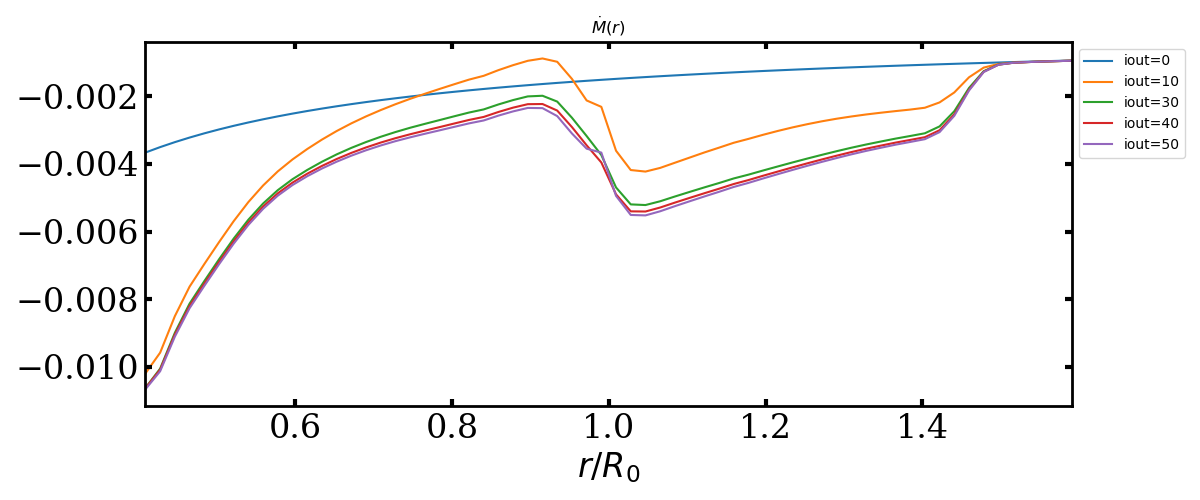

In [6]:
importlib.reload(athplot)
data_dir = "/home/astrosun/jtlaune/athena/work/type2/accrete/"
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(12,5))
for iout in [0,10,30, 40,50]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file,data_dir)
    profs = hdf5.load()
    #ax.plot(profs["rMidpts"],2*np.pi*profs["Sig"]*profs["vr"]*profs["rMidpts"],label=f"iout={iout}")
    ax.plot(profs["rMidpts"],profs["vr"],label=f"iout={iout}")
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
#ax.set_yscale("log")
ax.legend(bbox_to_anchor=[1,1,0,0])
ax.set_title(r"$\dot M(r)$")
ax.set_xlabel(r"$r/R_0$")
fig.tight_layout()

In [13]:
0.001/3/np.pi

0.0001061032953945969